In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')
# Display the data table for preview
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_results_df["Mouse ID"])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_results_df[["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

In [5]:
combined_results_df.loc[combined_results_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
Mouse_duplicated = combined_results_df[combined_results_df["Mouse ID"] == 'g989']
clean_df = combined_results_df[combined_results_df["Mouse ID"] != 'g989']
len(clean_df["Mouse ID"].unique())

248

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"])

1880

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_vol_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_stdev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame({"Mean Tumor Volume":tumor_vol_mean,
                              "Median Tumor Volume":tumor_vol_median,
                              "Tumor Volume Variance":tumor_vol_var,
                              "Tumor Volume Std. Dev.":tumor_vol_stdev,
                              "Tumor Volume Std. Err.":tumor_vol_sem})
tumor_summary

# Assemble the resulting series into a single summary dataframe.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [11]:
# Check the Drug regimen names
x_axis = clean_df["Drug Regimen"].unique()
x_axis

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
y_axis = clean_df["Drug Regimen"].value_counts()
y_axis

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

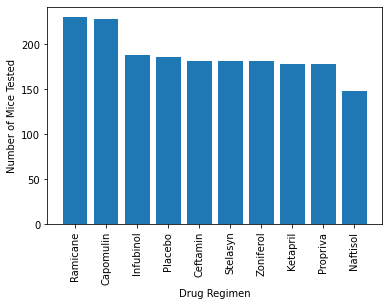

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = clean_df["Drug Regimen"].unique()

y_axis = clean_df["Drug Regimen"].value_counts()

count_chart = plt.bar(x_axis, y_axis)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

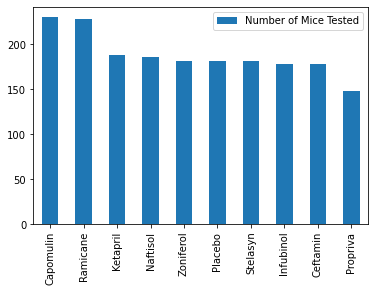

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

panda_df = pd.DataFrame({"Drug Regimen": x_axis, 
                         "Number of Mice Tested": y_axis})
panda_df

panda_chart = panda_df[["Drug Regimen","Number of Mice Tested"]].plot(kind="bar")
plt.show()

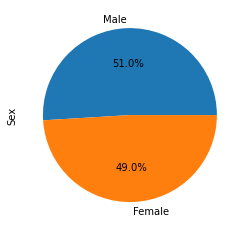

In [15]:
 # Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_chart = clean_df["Sex"].value_counts().plot(kind="pie", y="Sex", autopct='%.1f%%')
gender_chart  
plt.show()

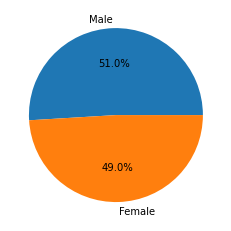

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = clean_df["Sex"].unique()
genders

matplotlib_pie = plt.pie(clean_df["Sex"].value_counts(), labels=genders, autopct="%1.1f%%")
plt.show()

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse

max_time_points = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_time_points = max_time_points.reset_index()
print(max_time_points)
print(type(max_time_points))
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
complete_df = max_time_points.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
complete_df

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens

# Create empty list to fill with tumor vol data (for plotting)
tumour_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    locations = complete_df.loc[complete_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumour_data.append(locations)
    
    # Determine outliers using upper and lower bounds
    qunatitles = locations.quantile([.25,.50,.75])

    q1 = qunatitles[0.25]
    q3 = qunatitles[0.75]
    IQR = q3 - q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers = locations.loc[(locations<lower)|(locations>upper)]
    
    print(drug)
    print(outliers)

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


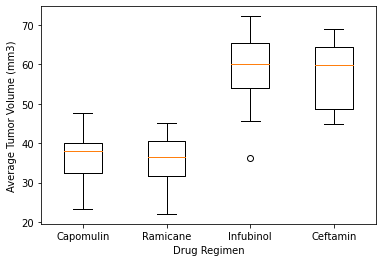

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumour_data, labels=regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

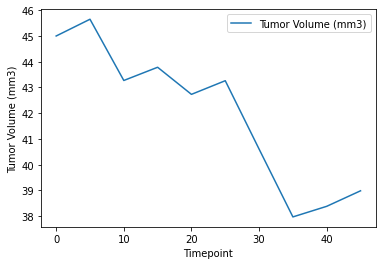

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_data
mouse = "b128"
mouse_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == mouse]
mouse_data
mouse_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

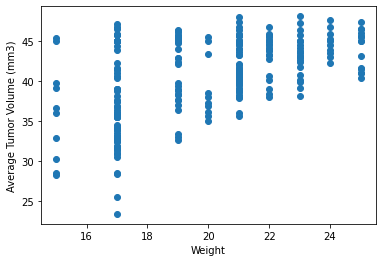

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter = plt.scatter(Capomulin_data.iloc[:,4],
                      Capomulin_data["Tumor Volume (mm3)"])

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'linregress' is not defined

In [65]:
Capomulin_data.loc(["Mouse ID"],"Weight (g)")


TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [56]:
location = Capomulin_data.loc[Capomulin_data["Mouse ID"], "Weight (g)"]

KeyError: "None of [Index(['s185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185',\n       's185',\n       ...\n       'i557', 'i557', 'i557', 'i557', 'i557', 'i557', 'r157', 'r157', 'r157',\n       'r157'],\n      dtype='object', length=230)] are in the [index]"